## Task 4

Optimization Model

#### Step-1

Importing Libraries and defining decision variables.

In [1]:
from pulp import LpMaximize, LpProblem, LpVariable
import pandas as pd
import matplotlib.pyplot as plt

# Create the LP model
model = LpProblem(name="warehouse-optimization", sense=LpMaximize)

# Define decision variables
laptops = LpVariable(name="Laptops", lowBound=1, cat="Integer")    #x
headphones = LpVariable(name="Headphones", lowBound=1, cat="Integer")   #y
keyboards = LpVariable(name="Keyboards", lowBound=1, cat="Integer")    #z

#### Step-2

Add the Objective Function (Maximize Profit)

In [2]:
# Define the objective function (maximize profit)
model += (
    4000 * laptops + 1500 * headphones + 2000 * keyboards,
    "Total_Profit"
)

#### Step-3

Add Constraints

In [3]:
# Add constraints

# Total space constraint
model += (3 * laptops + 1 * headphones + 2 * keyboards <= 100, "Warehouse_Space")

# Maximum demand constraints
model += (laptops <= 20, "Laptop_Demand")
model += (headphones <= 50, "Headphone_Demand")
model += (keyboards <= 30, "Keyboard_Demand")

#### Step-4

Solve the Model and Print the Results.

In [4]:
# Solve the model
model.solve()

# Print the results
print(f"Status: {model.status}")

print(f"Optimal number of Laptops to store: {laptops.value()}")
print(f"Optimal number of Headphones to store: {headphones.value()}")
print(f"Optimal number of Keyboards to store: {keyboards.value()}")

print(f"Maximum Profit: ₹{model.objective.value()}")

Status: 1
Optimal number of Laptops to store: 16.0
Optimal number of Headphones to store: 50.0
Optimal number of Keyboards to store: 1.0
Maximum Profit: ₹141000.0


#### Step-5

Product Summary Table

In [5]:
# Define product data
product_data = pd.DataFrame({
    "Product": ["Laptops", "Headphones", "Keyboards"],
    "Space Required (m³)": [3, 1, 2],
    "Profit per unit (₹)": [4000, 1500, 2000],
    "Maximum Demand (units)": [20, 50, 30]
})

product_data

,Product,Space Required (m³),Profit per unit (₹),Maximum Demand (units)
0,Laptops,3,4000,20
1,Headphones,1,1500,50
2,Keyboards,2,2000,30


#### Step-6

Visualizing the Data.

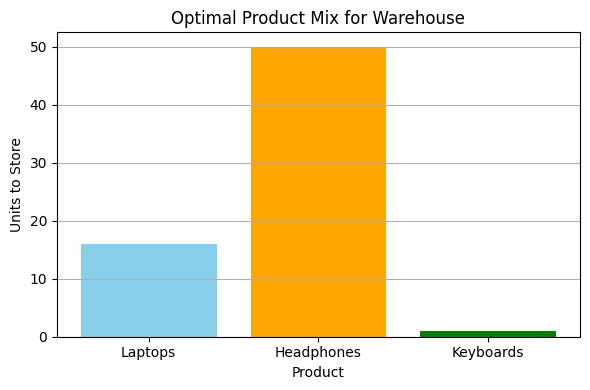

In [8]:
# Extract solution values
products = ["Laptops", "Headphones", "Keyboards"]
optimal_units = [
    laptops.value(),
    headphones.value(),
    keyboards.value()
]

# Plotting
plt.figure(figsize=(6, 4))
plt.bar(products, optimal_units, color=["skyblue", "orange", "green"])
plt.title("Optimal Product Mix for Warehouse")
plt.xlabel("Product")
plt.ylabel("Units to Store")
plt.grid(axis='y')
plt.tight_layout()
plt.show()